__Planes__

We've learnt how to make galaxy objects out of light and mass profiles. Now, we'll use these galaxies to make a strong-gravitational lens.

For newcomers to lensing, a strong gravitation lens is a system where two (or more) galaxies align perfectly down our line of sight, such that the foreground galaxy's mass (represented as mass profiles) deflects the light (represented as light profiles) of the background source galaxy(s).

When the alignment is just right and the lens is just massive enough, the background source galaxy appears multiple times. The schematic below shows a crude drawing of such a system, where two light-rays from the source are bending around the lens galaxy and into the observer (light should bend 'smoothly', but drawing this on a keyboard wasn't possible - so just pretend the diagonal lines coming from the observer and source are less jagged):

In [ ]:
#  Observer                  Image-Plane               Source-Plane
#  (z=0, Earth)               (z = 0.5)                (z = 1.0)
#
#           ----------------------------------------------
#          /                                              \ <---- This is one of the source's light-rays
#         /                      __                       \
#    o   /                      /  \                      __
#    |  /                      /   \                     /  \
#   /\  \                      \   /                     \__/
#        \                     \__/                 Source Galaxy (s)
#         \                Lens Galaxy(s)                /
#           \                                           / <----- And this is its other light-ray
#            ------------------------------------------/

As an observer, we don't see the source's true appearance (e.g. a round blob of light). Instead, we only observe its light after it is deflected and lensed by the foreground galaxy's mass. In this exercise, we'll make a source galaxy image whose light has been deflected by a lens galaxy.

In the schematic above, we used the terms 'Image-Plane' and 'Source-Plane'. In lensing speak, a 'plane' is a collection of galaxies at the same redshift (that is, parallel to one another down our line-of-sight). Therefore:

- If two or more lens galaxies are at the same redshift in the image-plane, they deflect light in the same way. This means we can sum the convergences, potentials and deflection angles of their mass-profiles.

- If two or more source galaxies are at the same redshift in the source-plane, their light is ray-traced in the same way. Therefore, when determining their lensed images, we can sum the lensed images of each galaxy's light-profiles.

So, lets do it - lets use the 'plane' module in AutoLens to create a strong lensing system like the one pictured above. For simplicity, we'll assume 1 lens galaxy and 1 source galaxy.

In [3]:

import autolens as al
import autolens.plot as aplt
%matplotlib inline


As always, we need a grid, where our grid is the coordinates we 'trace' from the image-plane to the source-plane in the lensing configuration above. Our grid is therefore no longer just a 'grid', but an image-plane grid representing our image-plane coordinates. Thus, lets name as such.

In [8]:
image_plane_grid = al.grid.uniform(
    shape_2d=(100, 100), pixel_scales=0.05, sub_size=1
)
print(image_plane_grid.shape)

(10000, 2)


Whereas before we called our galaxy's things like 'galaxy_with_light_profile', lets now refer to them by their role in lensing, e.g. 'lens_galaxy' and 'source_galaxy'.

In [88]:
mass_profile = al.mp.SphericalIsothermal(centre=(0.0, 0.0), einstein_radius=1.6)

lens_galaxy = al.Galaxy(redshift=0.5, mass=mass_profile)

light_profile = al.lp.SphericalSersic(
    centre=(0.0, 0.0), intensity=1.0, effective_radius=1.0, sersic_index=1.0
)

source_galaxy = al.Galaxy(redshift=1.0, light=light_profile)
light_profile_1 = al.lp.SphericalSersic(
    centre=(0.0, 0.0), intensity=1.0, effective_radius=1.0, sersic_index=1.0
)

light_profile_2 = al.lp.SphericalSersic(
    centre=(1.0, 1.0), intensity=1.0, effective_radius=2.0, sersic_index=2.0
)

light_profile_3 = al.lp.SphericalSersic(
    centre=(2.0, 2.0), intensity=1.0, effective_radius=3.0, sersic_index=3.0
)

light_profile_4 = al.lp.EllipticalSersic(
    centre=(1.0, -1.0),
    axis_ratio=0.5,
    phi=45.0,
    intensity=1.0,
    effective_radius=1.0,
    sersic_index=1.0,
)

mass_profile_1 = al.mp.SphericalIsothermal(
    centre=(0.0, 0.0), einstein_radius=1.0
)

mass_profile_2 = al.mp.SphericalIsothermal(
    centre=(1.0, 1.0), einstein_radius=2.0
)

mass_profile_3 = al.mp.SphericalIsothermal(
    centre=(2.0, 2.0), einstein_radius=3.0
)

mass_profile_4 = al.mp.EllipticalIsothermal(
    centre=(1.0, -1.0), axis_ratio=0.5, phi=45.0, einstein_radius=2.0
)

galaxy_with_many_profiles = al.Galaxy(
    redshift=0.5,
    light_1=light_profile_1,
    light_2=light_profile_2,
#     light_3=light_profile_3,
#     light_4=light_profile_4,
    mass_1=mass_profile_1,
    mass_2=mass_profile_2,
#     mass_3=mass_profile_3,
#     mass_4=mass_profile_4,
)
source_galaxy_with_many_profiles = al.Galaxy(
    redshift=1.0,
#     light_1=light_profile_1,
#     light_2=light_profile_2,
    light_3=light_profile_3,
    light_4=light_profile_4,
#     mass_1=mass_profile_1,
#     mass_2=mass_profile_2,
    mass_3=mass_profile_3,
    mass_4=mass_profile_4,
)

 Lets setup our image-plane. This plane takes the lens galaxy we made above.

In [89]:
image_plane = al.Plane(galaxies=[galaxy_with_many_profiles])

Just like we did with galaxies, we can compute quantities from the plane by passing it a grid.

In [90]:
deflections = image_plane.deflections_from_grid(grid=image_plane_grid)

print("deflection-angles of planes grid pixel 0:")
print(deflections.in_2d[0, 0, 0])
print(deflections.in_2d[0, 0, 0])

print("deflection-angles of planes grid pixel 1:")
print(deflections.in_2d[0, 1, 1])
print(deflections.in_2d[0, 1, 1])

deflection-angles of planes grid pixel 0:
1.4885465989302893
1.4885465989302893
deflection-angles of planes grid pixel 1:
-2.5367551446604
-2.5367551446604


Plane plotters exist, which work analogously to profile plotters and galaxy plotters.

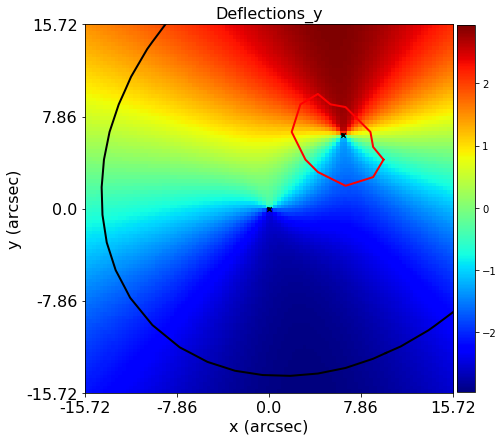

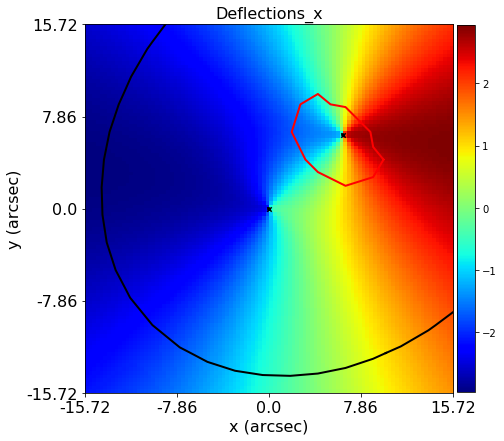

In [91]:
aplt.plane.deflections_y(plane=image_plane, grid=image_plane_grid)

aplt.plane.deflections_x(plane=image_plane, grid=image_plane_grid)

Throughout this chapter, we plotted lots of deflection angles. However, if you arn't familiar with strong lensing, you probably weren't entirely sure what they are actually used for. 

The deflection angles tell us how light is 'lensed' by a lens galaxy. By taking the image-plane coordinates and deflection angles, we can subtract the two to determine the source-plane's lensed coordinates, e.g.

source_plane_coordinates = image_plane_coordinates - image_plane_deflection_angles

Therefore, we can use our image_plane to 'trace' its grid to the source-plane...

In [92]:
source_plane_grid = image_plane.traced_grid_from_grid(grid=image_plane_grid)
print("Traced source-plane coordinates of grid pixel 0:")
print(source_plane_grid.in_2d[0, 0, :])
print("Traced source-plane coordinates of grid pixel 1:")
print(source_plane_grid.in_2d[0, 1, :])

Traced source-plane coordinates of grid pixel 0:
[0.9864534  0.07312601]
Traced source-plane coordinates of grid pixel 1:
[0.96964123 0.11175514]


... and use this grid to setup the source-plane

In [93]:
source_plane = al.Plane(galaxies=[source_galaxy_with_many_profiles])

Lets inspect our grids - I bet our source-plane isn't the boring uniform grid we plotted in the first tutorial!

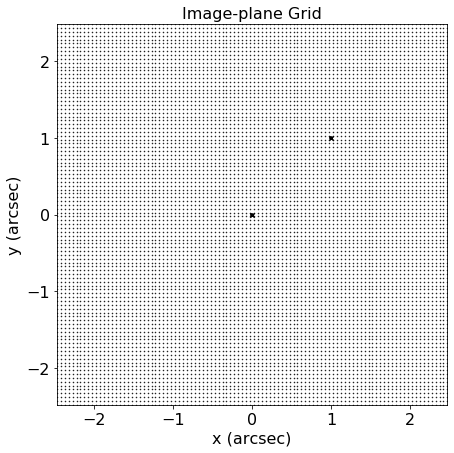

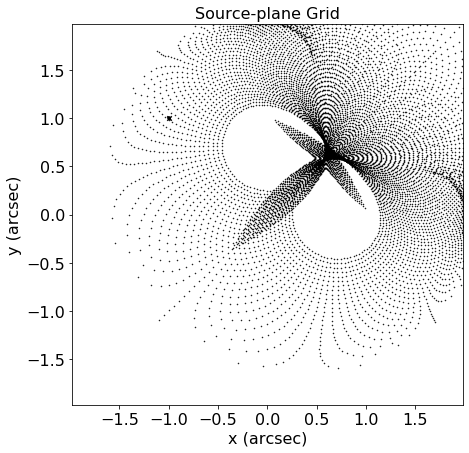

In [94]:
aplt.plane.plane_grid(
    plane=image_plane, 
    grid=image_plane_grid, 
    plotter=aplt.Plotter(labels=aplt.Labels(title="Image-plane Grid")),
)

aplt.plane.plane_grid(
    plane=source_plane, 
    grid=source_plane_grid,
    plotter=aplt.Plotter(labels=aplt.Labels(title="Source-plane Grid")),
)

We can zoom in on the 'centre' of the source-plane (remembering the lens galaxy was centred at (0.1", 0.1")

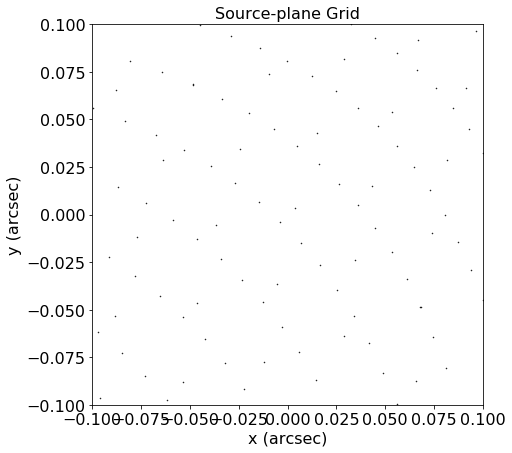

In [95]:
aplt.plane.plane_grid(
    plane=source_plane,
    grid=source_plane_grid,
    axis_limits=[-0.1, 0.1, -0.1, 0.1],
    plotter=aplt.Plotter(labels=aplt.Labels(title="Source-plane Grid")),
)

We can also plot both planes next to one another, and highlight specific points. This means we can see how different image pixels map to the source-plane (and visa versa).

(We are inputting the indexes of the grid into 'indexes' - the first set of indexes go from 0 -> 50, which is the top row of the image-grid running from the left - as we said it would!)

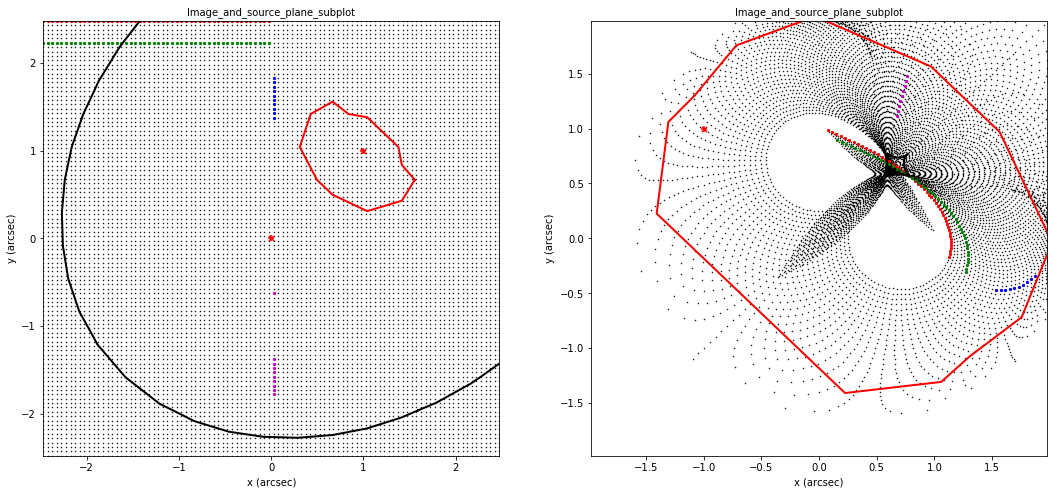

In [96]:
aplt.plane.image_and_source_plane_subplot(
    image_plane=image_plane,
    source_plane=source_plane,
    grid=image_plane_grid,
    indexes=[
        range(0, 50),
        range(500, 550),
        [1350, 1450, 1550, 1650, 1750, 1850, 1950, 2050, 2150, 2250],
        [6250, 8550, 8450, 8350, 8250, 8150, 8050, 7950, 7850, 7750],
    ],
)

Clearly, the source-plane's grid is very different to the image-planes! It's not uniform and its centrainly not boring!

We can now ask the question - 'what does our source-galaxy look like in the image-plane'? That is, to us, the observer on Earth, how does the source-galaxy appear after lensing?. To do this, we simple trace the source galaxy's light 'back' from the source-plane grid.

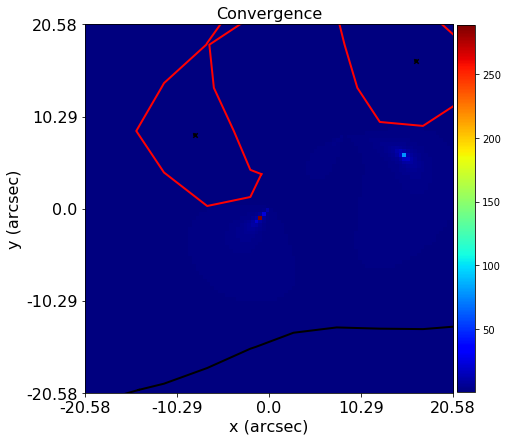

In [100]:
aplt.plane.convergence(plane=source_plane, grid=source_plane_grid)

It's a rather spectacular ring of light, but why is it a ring? Well:

- Our lens galaxy was centred at (0.0", 0.0").
- Our source-galaxy was centred at (0.0", 0.0").
- Our lens galaxy had a spherical mass-profile.
- Our source-galaxy a spherical light-profile.

Given the perfect symmetry of the system, every path the source's light takes around the lens galaxy is radially identical. Thus, nothing else but a ring of light can form!

This is called an 'Einstein Ring' and its radius is called the 'Einstein Radius', which are both named after the man who famously used gravitational lensing to prove his theory of general relativity.

Finally, because we know our source-galaxy's light profile, we can also plot its 'plane-image'. This image is how the source intrinsically appears in the source-plane (e.g. without lensing). This is a useful thing to know, because the source-s light is highly magnified, meaning astronomers can study it in a lot more detail than would otherwise be possible!

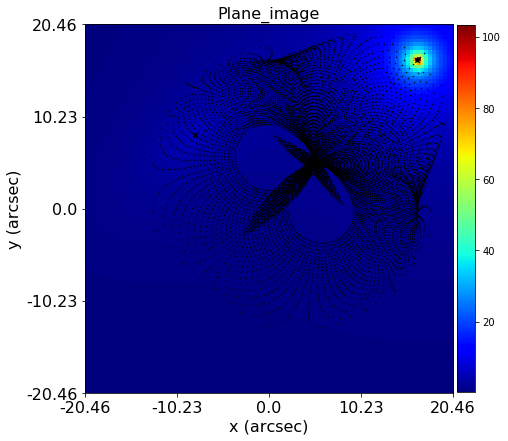

In [98]:
aplt.plane.plane_image(
    plane=source_plane, 
    grid=source_plane_grid, 
    include=aplt.Include(grid=True)
)

Plotting the grid over the plane image obscures its appearance, which isn't ideal. We can of course tell PyAutoLens not to plot the grid.

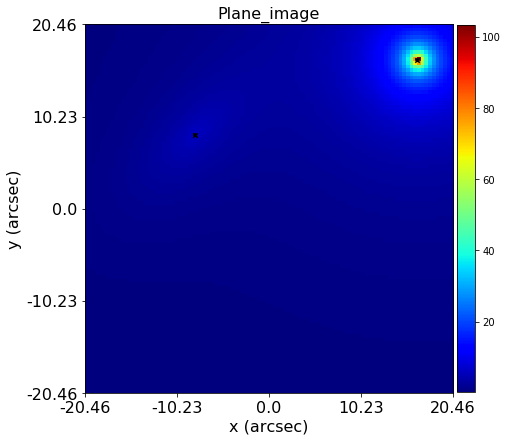

In [99]:
aplt.plane.plane_image(
    plane=source_plane, 
    grid=source_plane_grid, 
    include=aplt.Include(grid=False)
)

For mass profiles, you can also plot their 'critical curve' and 'caustics', which for those unfamiliar with lensing are defined as follows:

__Critical Curve__ - Lines of infinite magnification where the mass profile perfectly 'focuses' light rays. Source light near a critical curve appears much brighter than its true luminosity!

__Caustic__ - Given the deflection angles of the mass profile at the critical curves, the caustic is where the critical curve 'maps' too.

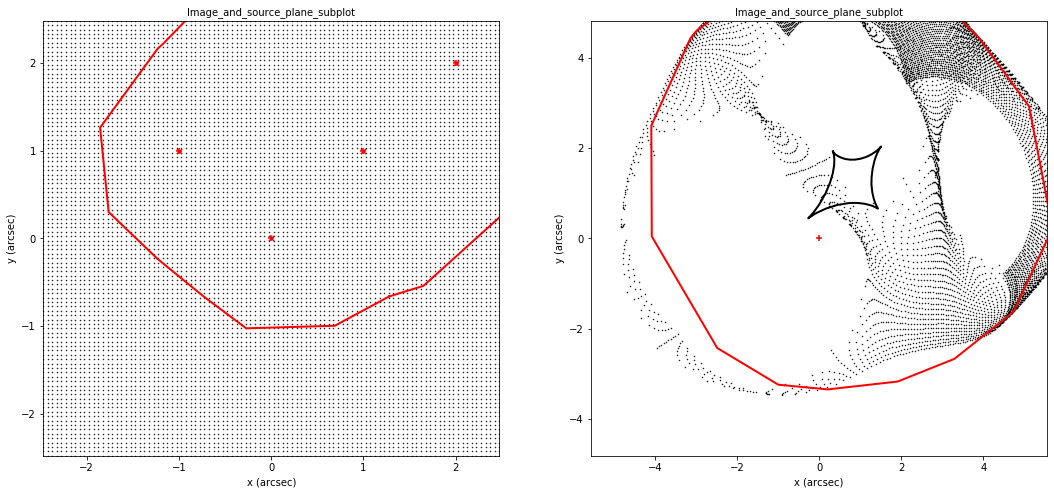

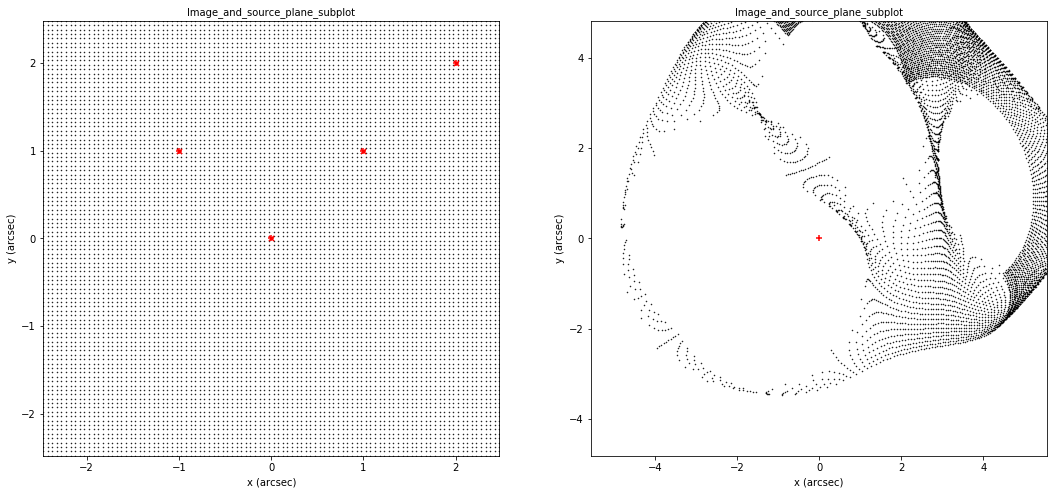

In [86]:
aplt.plane.image_and_source_plane_subplot(
    image_plane=image_plane,
    source_plane=source_plane,
    grid=image_plane_grid,
    include=aplt.Include(critical_curves=True, caustics=True),
)

aplt.plane.image_and_source_plane_subplot(
    image_plane=image_plane,
    source_plane=source_plane,
    grid=image_plane_grid,
    include=aplt.Include(critical_curves=False, caustics=False),
)

And, we're done. This is the first tutorial covering strong-lensing and I highly recommend you take a moment to really mess about with the code above to see what sort of lensed images you can form. Pay attention to the source-plane grid - its appearance can change a lot!

In particular, try:

1) Changing the lens galaxy's einstein radius - what happens to the source-plane's image?

2) Change the SphericalIsothermal mass-profile to an EllipticalIsothermal mass-profile and set its axis_ratio to 0.8. What happens to the number of source images?

3) As discussed at the beginning, planes can be composed of multiple galaxies. Make an the image-plane with two galaxies and see how multi-galaxy lensing leads to crazy source images. Also try making a source-plane with two galaxies!

Finally, if you are a newcomer to strong lensing, it might be worth reading briefly about some strong lensing theory. Don't worry about maths, and equations, and anything scary, but you should at least go to Wikipedia to figure out:

- What a critical line is.

- What a caustic is.

- What determines the image multiplicity of the lensed source.